<a href="https://colab.research.google.com/github/almaprateek/Rosmann_sales/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing datasets
data_df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Tiger project/Project -1 /Retail Sales Pred/Data _ Resources/Rossmann Stores Data.csv'))
store_df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Tiger project/Project -1 /Retail Sales Pred/Data _ Resources/store.csv'))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


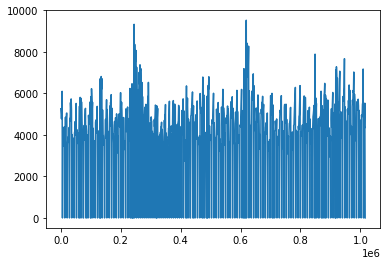

In [7]:
data_df[data_df['Store'] == 1]['Sales'].plot()

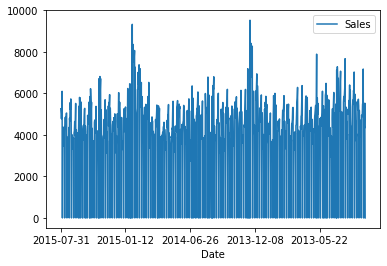

In [8]:
data_df[data_df['Store'] == 1].plot(x= 'Date',y= 'Sales')

In [9]:
data_df["Date"]=pd.to_datetime(data_df["Date"])
#qs - to find out which year has max sales 

data_df["year"]=data_df["Date"].dt.year
data_df['year']

0          2015
1          2015
2          2015
3          2015
4          2015
           ... 
1017204    2013
1017205    2013
1017206    2013
1017207    2013
1017208    2013
Name: year, Length: 1017209, dtype: int64

In [10]:
data_df.groupby('year').Sales.sum()


year
2013    2302876084
2014    2180804896
2015    1389499643
Name: Sales, dtype: int64

In [12]:
data_df[(data_df['SchoolHoliday'] == 1) & (data_df['StateHoliday'] != 0 )].Sales.mean()

6393.872600291494

In [13]:
data_df.groupby('DayOfWeek').Customers.sum().sort_index

<bound method Series.sort_index of DayOfWeek
1    117675012
2    110848063
3    105117642
4    101732938
5    108384820
6     95103854
7      5179426
Name: Customers, dtype: int64>

In [15]:
data_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year
0,1,5,2015-07-31,5263,555,1,1,0,1,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,2015


# Let's find the effect of competition distance

In [18]:
df1 = data_df.groupby('Store')['Sales'].sum().reset_index()
df1

,Store,Sales
0,1,3716854
1,2,3883858
2,3,5408261
3,4,7556507
4,5,3642818
...,...,...
1110,1111,4091076
1111,1112,7974294
1112,1113,5196242
1113,1114,16202585


In [19]:
df2 = pd.merge(df1,store_df,how = 'inner',left_on = 'Store',right_on = 'Store')
df2

,Store,Sales,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3716854,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3883858,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5408261,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,7556507,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,3642818,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,4091076,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,7974294,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,5196242,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,16202585,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


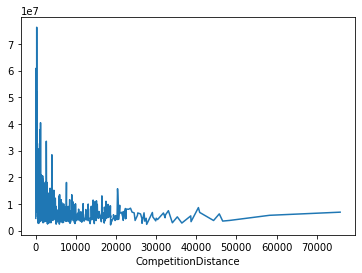

In [20]:
df2.groupby('CompetitionDistance').Sales.sum().plot( )

In [21]:
df3 = pd.merge(data_df,store_df,how = 'inner',left_on = 'Store',right_on = 'Store')
df3

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,2013,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,2013,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,2013,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,2013,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


# Effect of promo 2

In [22]:
df3.groupby('Promo2')['Sales','Customers'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Customers
Promo2,,
0,3111542628,357125490
1,2761637995,286916265


## Insight  - It seems like promo2 doesn't work well for the businness as the no of sales and customers decreases .

# Which store drives the most customers??

In [23]:
df3.groupby("StoreType").agg({"Customers":["mean","sum"]})

Customers           
                  mean        sum
StoreType                        
a           659.034880  363541434
b          1987.720846   31465621
c           673.265894   92129705
d           501.434892  156904995

In [24]:
df3.groupby("Promo")['Sales','Customers'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Customers
Promo,,
0,4406.050805,517.823542
1,7991.152046,820.098815


## Insight - So , It seems promo 1 works well for Rosmman where promo 2 doesn't.So, rosmaan store could drop promo 2 programme.

In [25]:
df4 = df3.groupby('Assortment')['Sales','Customers'].mean().reset_index()
df4['Sales/Customer'] = df4['Sales']/df4['Customers']
df4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Assortment,Sales,Customers,Sales/Customer
0,a,5481.026096,619.164636,8.852292
1,b,8553.931999,2046.361828,4.180068
2,c,6058.676567,624.222733,9.705953


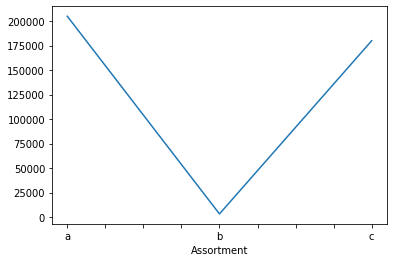

In [26]:
df3.groupby('Assortment')['Promo'].sum().plot()

In [27]:
df3[df3['year'] == '2013'].groupby('month')['Sales'].sum().sort_values()

month
Feb    171534275
Sep    178053963
Jan    180132207
Jun    180702351
Apr    183431432
May    185411063
Oct    187662330
Nov    196170924
Aug    198042727
Mar    201180369
Jul    208843882
Dec    231710561
Name: Sales, dtype: int64

In [54]:
df3[(df3['StateHoliday']!= 0) | (df3['SchoolHoliday'] == 1)].Sales.mean()

5816.336931430598

In [64]:
df3.groupby(df3["Date"].dt.quarter)["Sales"].mean()

Date
1    5631.292713
2    5661.250306
3    5822.689660
4    6125.178993
Name: Sales, dtype: float64

In [65]:
df3['Date'].dt.to_period('M')

0          2015-07
1          2015-07
2          2015-07
3          2015-07
4          2015-07
            ...   
1017204    2013-01
1017205    2013-01
1017206    2013-01
1017207    2013-01
1017208    2013-01
Name: Date, Length: 1017209, dtype: period[M]

In [92]:
df5= df3.groupby([df3['Date'].dt.year,'StoreType']).Sales.mean().reset_index()
df5

,Date,StoreType,Sales
0,2013,a,5670.908378
1,2013,b,9341.911201
2,2013,c,5641.527175
3,2013,d,5464.424500
4,2014,a,5785.079961
5,2014,b,10399.462216
6,2014,c,5768.858215
7,2014,d,5705.476185
8,2015,a,5778.931925
9,2015,b,10724.104883


In [30]:
import seaborn as sns
sns.barplot(y='Sales', x='Date', data=df5, hue='StoreType')

NameError: ignored

In [79]:
df5.groupby(df5['Date'])['Sales'].max()

Date
2013    7564632
2014    7539709
2015    4412501
Name: Sales, dtype: int64

In [ ]:
plt.bar(ind+width, yvals, width, color='g')

In [33]:
df6=df3.groupby(['year','StoreType'])['Sales','Customers'].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [39]:
df3

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,2013,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,2013,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,2013,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,2013,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [63]:
df3.iloc[list(df3['SchoolHoliday']== 1),[3,4]]

,Sales,Customers
0,5263,555
1,5020,546
2,4782,523
3,5011,560
4,6102,612
...,...,...
1017204,4771,339
1017205,4540,326
1017206,4297,300
1017207,3697,305


In [65]:
df3.loc[lambda df3: df3.Sales > 5000, :]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
17,1,2,2015-07-14,5042,544,1,1,0,0,2015,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017190,1115,6,2013-01-19,5207,369,1,0,0,0,2013,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017198,1115,5,2013-01-11,5142,351,1,1,0,1,2013,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017199,1115,4,2013-01-10,5007,339,1,1,0,1,2013,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017201,1115,2,2013-01-08,5243,341,1,1,0,1,2013,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
